In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Needed for Python to find the util modules
sys.path.insert(0, "src")
sys.path.insert(0, "..")
import util.m06_model_plotting as plot_util
import util.m00_general_util as util

In [2]:
print(os.getcwd())
os.chdir("../..")

C:\Users\sebne\OneDrive\Documents\FHWN_Tulln\DataAnalysis\repo\src\notebooks


In [26]:
# Combining JSON files into one
#my_files = ["output/model_evaluation/model_output_pca.json", "output/model_evaluation/model_output_pls.json", "output/model_evaluation/model_output_pca_savgol.json"]
#util.merge_json_files(my_files, output_file="model_output_balanced_specimen1.json")

In [4]:
def show_train_test_heatmap_old(model_results, title, left_metric = "Test_R2", right_metric = "Train_R2", cmap = "YlGnBu"):
    pivot = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    ax1, ax2 = axes
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax1)
    ax1.set_title(f"{title} - {left_metric}")
    pivot = plot_util.create_model_performance_pivot(model_results, metric=right_metric)
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax2)
    ax2.set_title(f"{title} - {right_metric}")
    plt.show()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_train_test_heatmap(model_results, title, left_metric="Test_R2", right_metric="Train_R2", cmap="YlGnBu"):
    # Create pivots for heatmaps
    pivot_left = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    pivot_right = plot_util.create_model_performance_pivot(model_results, metric=right_metric)

    # Determine the global min and max for color scaling
    vmin = min(pivot_left.min().min(), pivot_right.min().min())
    vmax = max(pivot_left.max().max(), pivot_right.max().max())

    # Set figure size dynamically based on the pivot table shape
    rows, cols = pivot_left.shape
    fig_size = (cols * 1.5, rows * 1.5)  # Adjust scaling factor as needed

    # Create figure and axes for heatmaps
    fig, axes = plt.subplots(1, 2, figsize=fig_size, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.3})
    ax1, ax2 = axes

    # Create the heatmaps with shared vmin/vmax and smaller font size
    sns.heatmap(pivot_left, cmap=cmap, annot=True, fmt=".3f", ax=ax1, vmin=vmin, vmax=vmax, cbar=False, 
                square=True, annot_kws={"size": 10})  # Adjust annotation font size
    ax1.set_title(f"{title} - {left_metric}", fontsize=10)  # Adjust title font size
    ax1.set_aspect("equal")  
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)  # Adjust x-axis label size
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)  # Adjust y-axis label size

    # Adjust the colorbar size to match the heatmap
    cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [left, bottom, width, height]
    
    sns.heatmap(pivot_right, cmap=cmap, annot=True, fmt=".3f", ax=ax2, vmin=vmin, vmax=vmax, cbar=True, 
                cbar_ax=cbar_ax, square=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})  
    ax2.set_title(f"{title} - {right_metric}", fontsize=10)  
    ax2.set_aspect("equal")  
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)  
    ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=8)  

    # Adjust colorbar font size
    cbar_ax.tick_params(labelsize=10)  

    # Show the plot
    plt.show()


In [10]:
def show_single_heatmap(model_results, title, metric="Test_R2", cmap="YlGnBu"):
    # Create pivots for heatmaps
    pivot = plot_util.create_model_performance_pivot(model_results, metric=metric)

    fig, axes = plt.subplots(figsize=(15,4))
    rows, cols = pivot.shape
    fig_size = (cols * 1.5, rows * 1.5)  

    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", cbar=True, 
                square=True, annot_kws={"size": 10},vmin=0.8, vmax=1)  # Adjust annotation font size
    axes.set_title(f"{title} - {metric}", fontsize=10)  # Adjust title font size
    axes.set_aspect("equal")  
    axes.set_xlabel("pre-processing")  # Adjust title font size
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=8)  # Adjust x-axis label size
    axes.set_yticklabels(axes.get_yticklabels(), fontsize=8)  # Adjust y-axis label size


    # Show the plot
    plt.show()

In [6]:
balanced_specimen1_pca = pd.read_json("output/model_evaluation/model_output_balanced_specimen1.json")

#show_single_heatmap(balanced_specimen1_pca, title="Balanced Model-PCA, Specimen split", left_metric="Test_RMSE", right_metric="Train_RMSE")

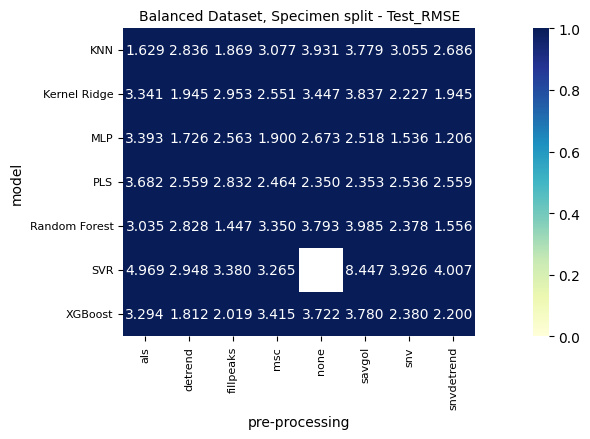

In [7]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Test_RMSE")


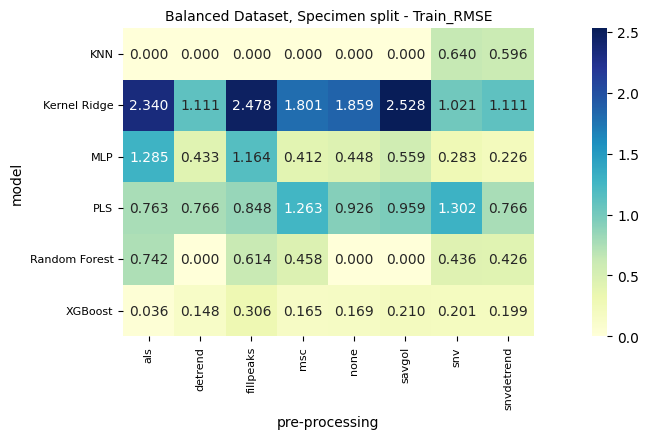

In [32]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Train_RMSE")


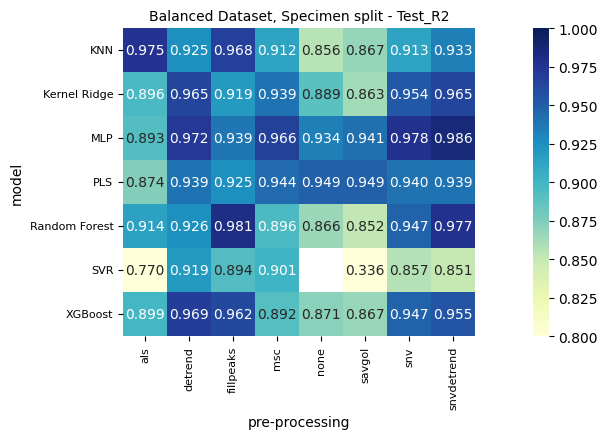

In [11]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Test_R2")


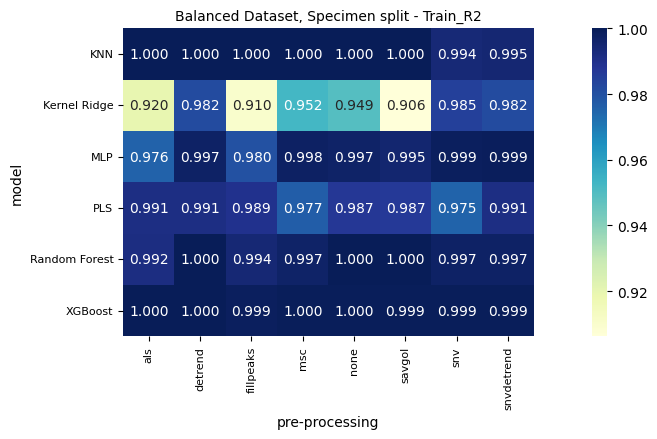

In [34]:
show_single_heatmap(balanced_specimen1_pca, title="Balanced Dataset, Specimen split", metric="Train_R2")


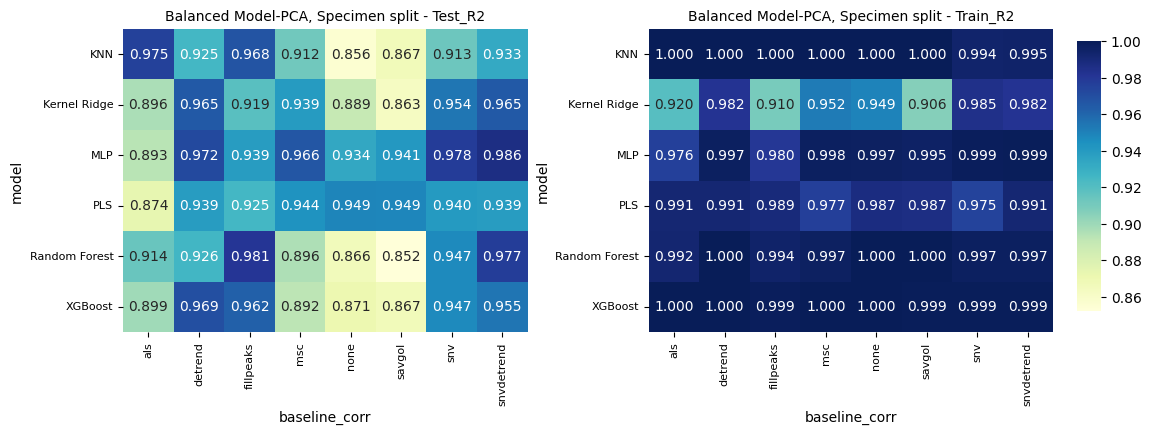

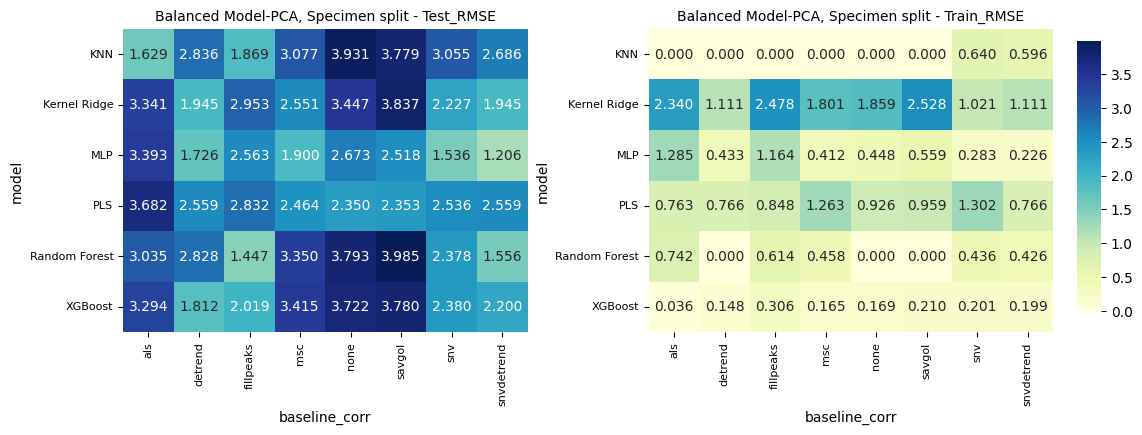

In [11]:
#balanced_specimen1_no_pca = pd.read_json("temp/spectra_treated/nir/balanced/model_output_no_pca.json")
#show_train_test_heatmap(balanced_specimen1_no_pca, "Balanced Model, Specimen split")
#show_train_test_heatmap(balanced_specimen1_no_pca, "Balanced Model, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

balanced_specimen1_pca = pd.read_json("output/model_evaluation/model_output_balanced_specimen1.json")
balanced_specimen1_pca = balanced_specimen1_pca.loc[balanced_specimen1_pca['model'] != 'SVR']

show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA, Specimen split")
show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA, Specimen split",left_metric="Test_RMSE", right_metric="Train_RMSE")


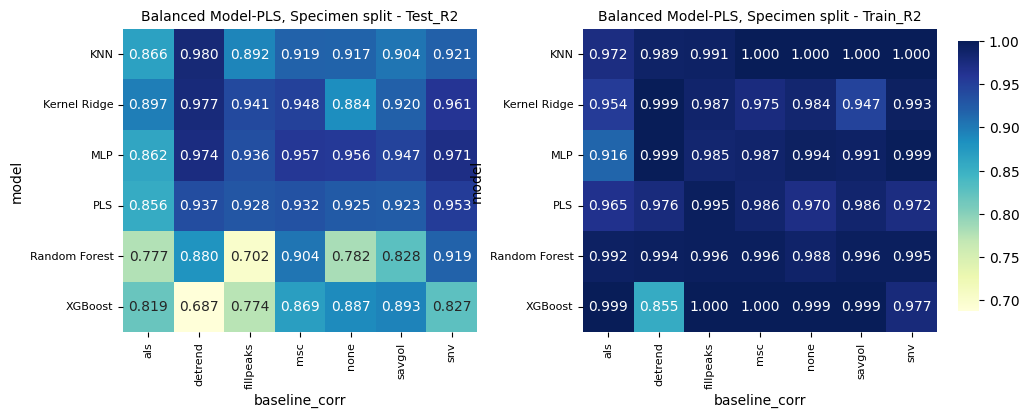

In [10]:
balanced_specimen1_pls = pd.read_json("output/model_evaluation/model_output_final_models.json")
show_train_test_heatmap(balanced_specimen1_pls, "Balanced Model-PLS, Specimen split")
#show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA-No30, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")


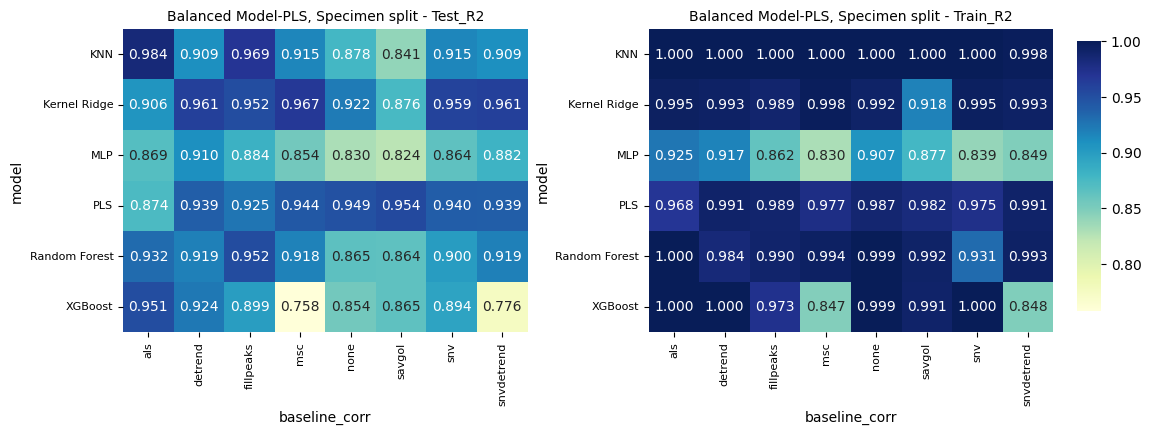

In [12]:
balanced_specimen1_withoutpca = pd.read_json("output/model_evaluation/model_output_no_pca.json")
show_train_test_heatmap(balanced_specimen1_withoutpca, "Balanced Model-PLS, Specimen split")
#show_train_test_heatmap(balanced_specimen1_pca, "Balanced Model-PCA-No30, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

In [1]:
#balanced_specimen = pd.read_json("../../temp/spectra_treated/nir/balanced/model_output_balanced_scaling.json")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

#balanced_specimen = pd.read_json("../../temp/spectra_treated/nir/balanced/pls_xgb_model_output_balanced_scaling.json")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

,model,baseline_corr,Test_RMSE,Test_R2,Train_RMSE,Train_R2,training_time,prediction_time,best_params
0,KNN,detrend,2.836171,0.925180,0.000000e+00,1.000000,1.239687,0.006398,"{'weights': 'distance', 'p': 1, 'n_neighbors':..."
1,Random Forest,detrend,2.827914,0.925615,5.983305e-14,1.000000,264.889646,0.078288,"{'n_estimators': 500, 'min_samples_split': 2, ..."
2,XGBoost,detrend,1.811661,0.969471,1.481015e-01,0.999678,43.316698,0.001900,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha..."
3,MLP,detrend,1.726366,0.972278,4.328066e-01,0.997252,331.132818,0.000600,"{'learning_rate_init': 0.1, 'hidden_layer_size..."
4,Kernel Ridge,detrend,1.944653,0.964825,1.110895e+00,0.981899,0.721435,0.005713,"{'gamma': 1.0, 'alpha': 0.1}"
6,KNN,msc,3.076575,0.911958,0.000000e+00,1.000000,1.167969,0.006453,"{'weights': 'distance', 'p': 1, 'n_neighbors':..."
7,Random Forest,msc,3.350214,0.895601,4.584789e-01,0.996917,179.012307,0.030238,"{'n_estimators': 200, 'min_samples_split': 5, ..."
8,XGBoost,msc,3.414935,0.891528,1.654384e-01,0.999599,38.196117,0.001990,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha..."
9,MLP,msc,1.900249,0.966413,4.118683e-01,0.997512,365.645952,0.000590,"{'learning_rate_init': 0.1, 'hidden_layer_size..."
10,Kernel Ridge,msc,2.550502,0.939493,1.801149e+00,0.952416,0.709039,0.003062,"{'gamma': 10.0, 'alpha': 0.1}"
